# データファイルの読み込みと可視化

- CSV形式データファイル読み取り　->　配列データに変換 ->　可視化
- <u>CSV形式file</u>
    - コンマで区切られた text data file
    - 表形式dataの標準的なフォーマット
    - Excelrと同じ（スプレットシート）
    - 非常に汎用的に使用される・多様される読み込みfile data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### data file の読み込み

In [8]:
# 読み込みfile　:　文字code(その形で読み込む)　:　先頭1行目は data の対象外としてスキップして読み込む :　区切り文字は',(コンマ)'だと教える
seiseki = np.loadtxt('seiseki.csv', encoding='utf-8', skiprows=1, delimiter=',') 

In [11]:
seiseki.shape

(2000, 3)

In [12]:
# 先頭から３行目未満 : indexで言うと　0 ~ 2 まで
print(seiseki[:3])

[[ 1. 73. 41.]
 [ 2. 67. 61.]
 [ 3. 44.  1.]]


In [13]:
# 末尾から３行目未満 : index -1 ~ -3 まで
print(seiseki[-3:])

[[1998.   63.   55.]
 [1999.   66.   30.]
 [2000.   77.    4.]]


### 列の抜き出し

In [16]:
# seiseki[:,1]　->　コロン（:）=全行という意味　/　indexの１行目　/　
# 取得されたものは、一次元配列なので横並びで表示される
c1 = seiseki[:,1]
print(c1)

[73. 67. 44. ... 63. 66. 77.]


## 度数分布(ヒストグラム)

Text(0.5, 1.0, 'kokugo')

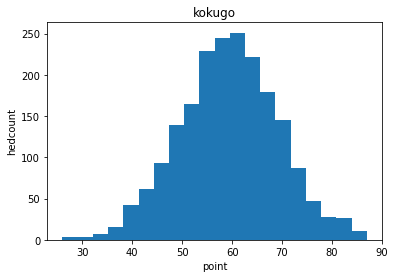

In [18]:
g = plt.hist(c1, bins=20) # data :　データの区切り（段階）
plt.xlabel('point')
plt.ylabel('hedcount')
plt.title('kokugo')

Text(0.5, 1.0, 'sugaku')

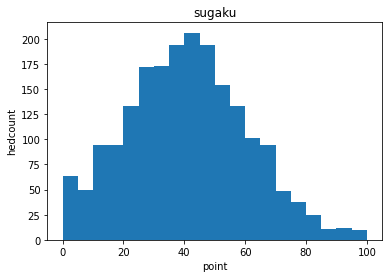

In [22]:
# 直接抜き出しの式を記述して表示する
g = plt.hist(seiseki[:,2] , bins=20)
plt.xlabel('point')
plt.ylabel('hedcount')
plt.title('sugaku')

- 統計的な data は往々にして平均値にたくさん人が集まっている

## 散布図
- 誰が何処にどれくらい分布しているのか

Text(0.5, 1.0, 'scatter plot')

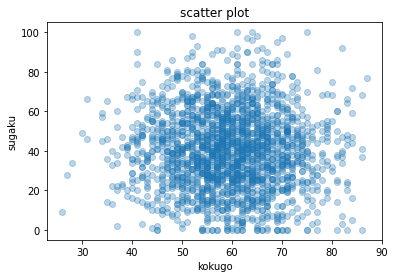

In [25]:
plt.scatter(seiseki[:,1], seiseki[:,2], alpha=0.3) # alpha=プロットする各マーカーの不透明度を指定する事ができる / 0 ~ 1 の間で調整。１が完全不透明
plt.xlabel('kokugo')
plt.ylabel('sugaku')
plt.title('scatter plot')

- 1つの点が１人の受験者
    - どの点数領域にどの人がいるのか?を１点１点プロットした形

## まとめ
- <u>テキストfileの読み込み方法</u>
    - 機械学習・人工知能で非常に使用頻度が高い
    - **np.loadtxt(file名,)**
        - delimiter　=　区切り文字　（列の区切りもじ）
        - encoding　=　文字コード　（見出し文字、全角文字が使用されている事が多い）
        - sikprows　=　先頭で読み飛ばす行数　（見出しは配列データとして扱えないので）


    - **fileの内容をNumPy配列として返す**
    - 「区切り文字」　:　
        - CSVの場合は　','(コンマ)
        - tsv　:　ダブの区切りの場合は '￥t'(システムによっては'\t')
        

- <u>二次元（表形式）配列から特定の「列」を取り出す</u>
    - 配列[ :,列のindex ]　/　：（コロン）＝全部の行という意味



### 可視化の表現方法
- <u>度数分布(ヒストグラム)</u>
    - plt.hist(一次元配列, bins=階級数) 


- <u>散布図</u>
    - plt.scatter(横軸データ, 縦軸データ)
    - 外観・感触の取得だけではなく…
    - 機械学習・人工知能のdataは非常のたくさんの列から構成される(横長の)CSVデータ
        - **各項目間の関係を眺めるのに散布図がかなり使用される** 
        - **特に機械学習**
            - どの辺に集団があるのか？を見るのに散布図を使用して感触を掴む

    - マーカーの不透明度を指定すると見やすくなる
        - alpha　=　0 ~ 1.0
        - 0　->　完全に透明（見えない）
        - 1.0　->　完全に不透明

# データファイルの保存

## 表形式（二次元）の配列を保存する
- sample data の配列作成

In [28]:
N = 1000  # 表の行数
a = np.arange(1, N+1).reshape(N,1)  # 一次元配列作成（始点, 終点）行　->, 列　:　1次元データを多次元に変換する（行, 列）

# 列を束ねていく
for i in range(2, 10):                                 # 2倍数から9の倍数まで(10未満)
    a = np.hstack((a, (a[:,0]*i).reshape(N, 1)))       # 倍数の列を次々と束ねていく / tuple()型で記述

In [29]:
# 先頭5行の確認表示
print(a[:5])

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]]


### fileの保存

In [30]:
np.savetxt('out01.csv', a, delimiter=',')  # file名.拡張子　:　保存したい配列data　:　区切り文字('何で区切るか')

- 浮動小数点数の指数表現でcsv file が生成される　->　科学技術系の表現としては合っているが…見づらい。理解しにくい。

## 出力の仕方の書式設定をする
-　自分が使用している data に相応しい書式設定にする

In [34]:
np.savetxt('out01.csv', a, delimiter=',', fmt='%.1f')  # fmt(format)で数値設定の書式設定を指定する　:　小数点以下１桁

In [35]:
np.savetxt('out01.csv', a, delimiter=',', fmt='%d')  # fmt(format)で数値設定の書式設定を指定する　:　整数表示

#### 列ごとに表示形式を変更する事もできる

### fmt=['%d', '%.1f']
- list型にして、この列は整数、この列は小数などの指定ができる

### 見出し行を付けて出力する

In [36]:
hd = 'i'
for i in range(2, 10):
    hd = hd + ',' + str(i) + 'i'
print(hd)

i,2i,3i,4i,5i,6i,7i,8i,9i


In [37]:
np.savetxt('out01.csv', a, delimiter=',', fmt='%d', header=hd) # header : 出力時の先頭に付けることができる

### 先頭行は data として扱われない
- 先頭行は comment（コメント）として扱われる
    - なので先頭に　＃　マークを付けてコレは comment ですよと表示してくれた
    - 見づらいので # を取り去る

In [38]:
np.savetxt('out01.csv', a, delimiter=',', fmt='%d', header=hd, comments='')  # comments= ' '　:　空っぽにすることによって　#　を取り去ることができる

## まとめ
- <u>指定した行の取り出し(二次元配列)</u>
    - 配列[ :5 ]　->　先頭から５行分取り出し
    - 配列[ 10:20 ]　->　index位置の10行目から19行目まで


- <u>fileへの保存</u>
    - **np.savetxt***('file名.拡張子', 出力したい配列data)
        - delimiter=区切り文字
        - encoding=文字コード
        - fmt=書式
        - header見出し行
        - comments=コメント文字
        
    - 「書式」
        - 小数点数　:　'%桁数 . 小数点以下の桁 f'
        - 整数　: '%桁数d'
        
    - 列ごとに表示形式を変更する事もできる
        - fmt=['%d', '%.1f']
        - list型にして、この列は整数、この列は小数などの指定ができる


- <u>先頭行は data として扱われない</u>
    - 先頭行は comment（コメント）として扱われる
        - なので先頭に　＃　マークを付けてコレは comment ですよと表示してくれた
        - 見づらいので # を取り去る